In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('StudentPerformanceFactors.csv')
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_15312\3911072532.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15312\3911072532.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

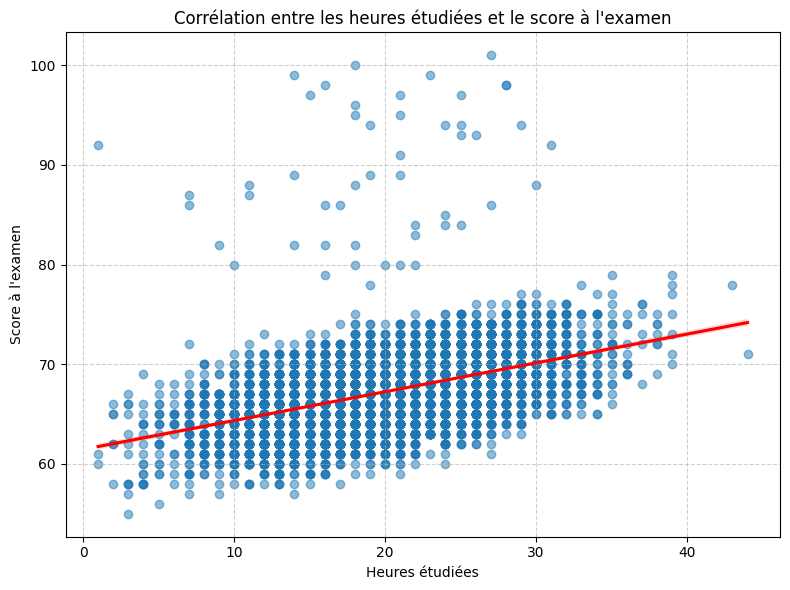

In [151]:
#Storytelling visuel par thème
#Correlation entre les heures étudiées et le score à l'examen
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Hours_Studied',
    y='Exam_Score',
    data=df,
    scatter_kws={'alpha': 0.5},  # transparence des points
    line_kws={'color': 'red'},   # couleur de la droite
    ci=95
)

# Titres et axes
plt.title('Corrélation entre les heures étudiées et le score à l\'examen')
plt.xlabel('Heures étudiées')
plt.ylabel('Score à l\'examen')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Affichage du graphique
plt.show()





C:\Users\user\AppData\Local\Temp\ipykernel_15312\3465205716.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attendance_Level', y='Exam_Score', data=df, palette='Set3')


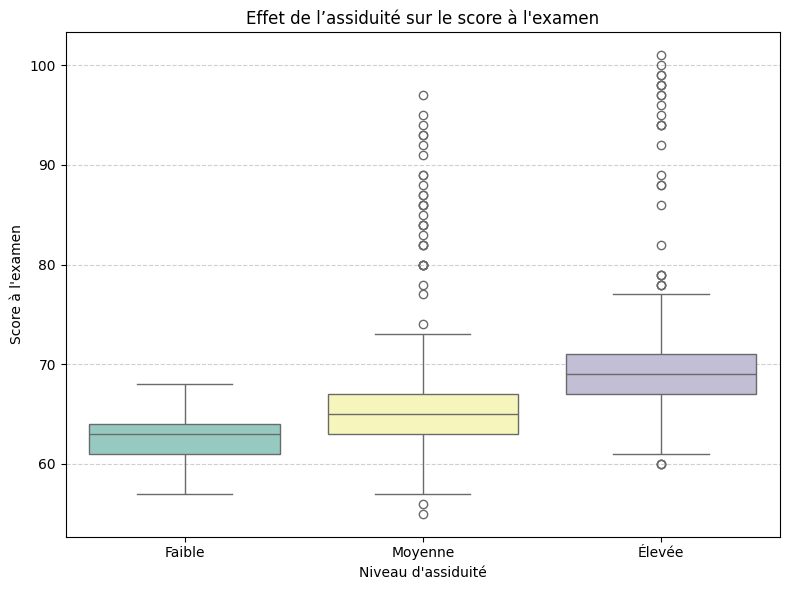

In [152]:


# Créer des tranches d'assiduité
bins = [0, 60, 80, 100]
labels = ['Faible', 'Moyenne', 'Élevée']
df['Attendance_Level'] = pd.cut(df['Attendance'], bins=bins, labels=labels, right=True)

# Visualisation : boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attendance_Level', y='Exam_Score', data=df, palette='Set3')

# Titres et axes
plt.title('Effet de l’assiduité sur le score à l\'examen')
plt.xlabel('Niveau d\'assiduité')
plt.ylabel('Score à l\'examen')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


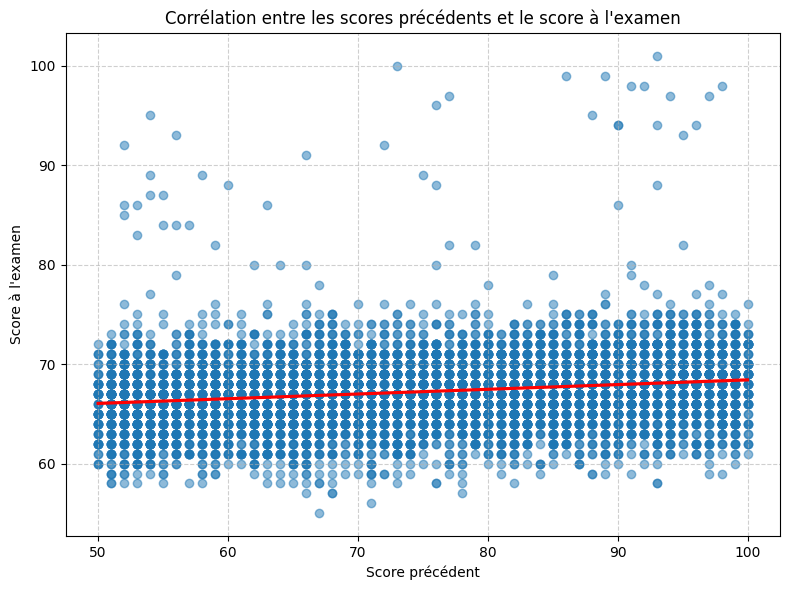

In [153]:

plt.figure(figsize=(8, 6))
sns.regplot(
    x='Previous_Scores',
    y='Exam_Score',
    data=df,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
    ci=95
)

plt.title('Corrélation entre les scores précédents et le score à l\'examen')
plt.xlabel('Score précédent')
plt.ylabel('Score à l\'examen')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15312\1738561767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


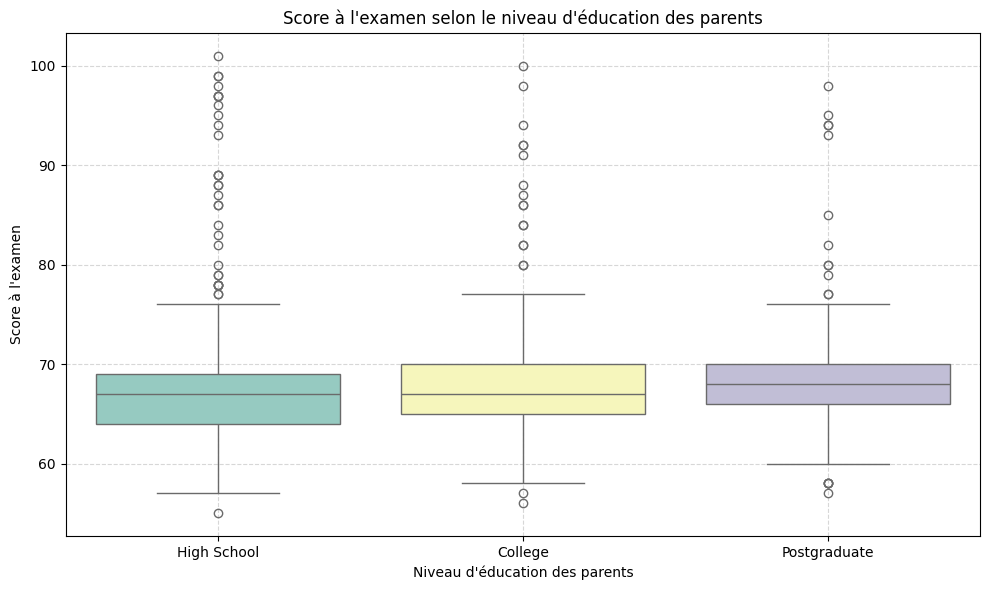

In [154]:
#Facteurs familiaux et socio-économiques
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Parental_Education_Level',
    y='Exam_Score',
    data=df,
    palette='Set3'
)

plt.title('Score à l\'examen selon le niveau d\'éducation des parents')
plt.xlabel('Niveau d\'éducation des parents')
plt.ylabel('Score à l\'examen')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



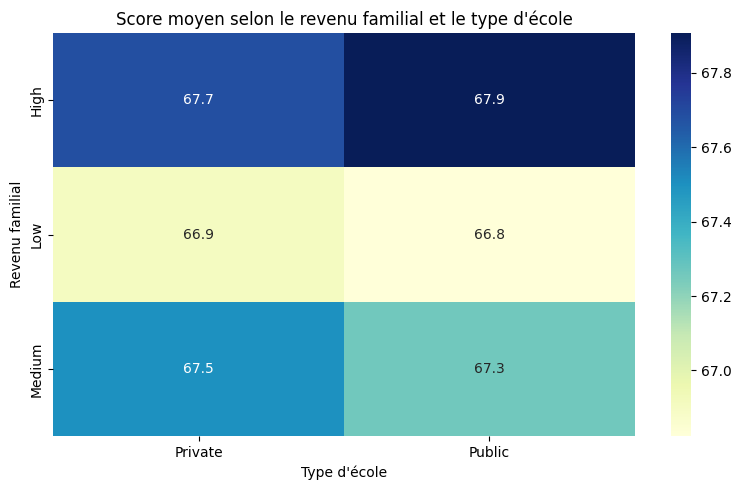

In [155]:

pivot_data = df.pivot_table(
    values='Exam_Score',
    index='Family_Income',
    columns='School_Type',
    aggfunc='mean'
)

plt.figure(figsize=(8, 5))
sns.heatmap(
    pivot_data,
    annot=True,
    cmap='YlGnBu',
    fmt=".1f"
)

plt.title('Score moyen selon le revenu familial et le type d\'école')
plt.xlabel('Type d\'école')
plt.ylabel('Revenu familial')
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15312\100117047.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_15312\100117047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


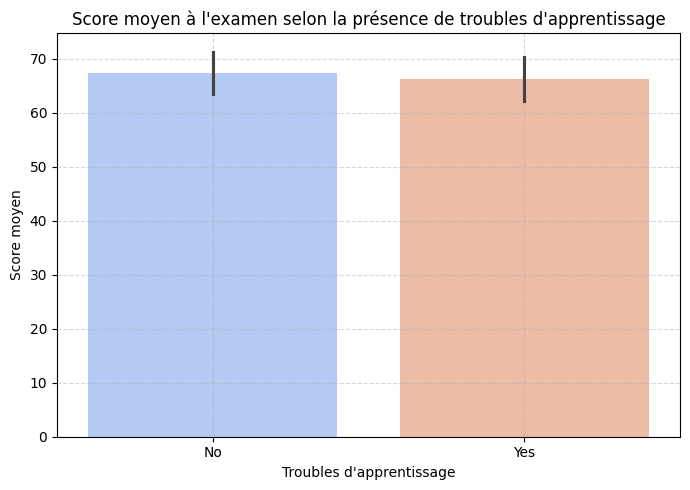

In [156]:
plt.figure(figsize=(7, 5))
sns.barplot(
    x='Learning_Disabilities',
    y='Exam_Score',
    data=df,
    estimator='mean',
    ci='sd',
    palette='coolwarm'
)
plt.title('Score moyen à l\'examen selon la présence de troubles d\'apprentissage')
plt.xlabel('Troubles d\'apprentissage')
plt.ylabel('Score moyen')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


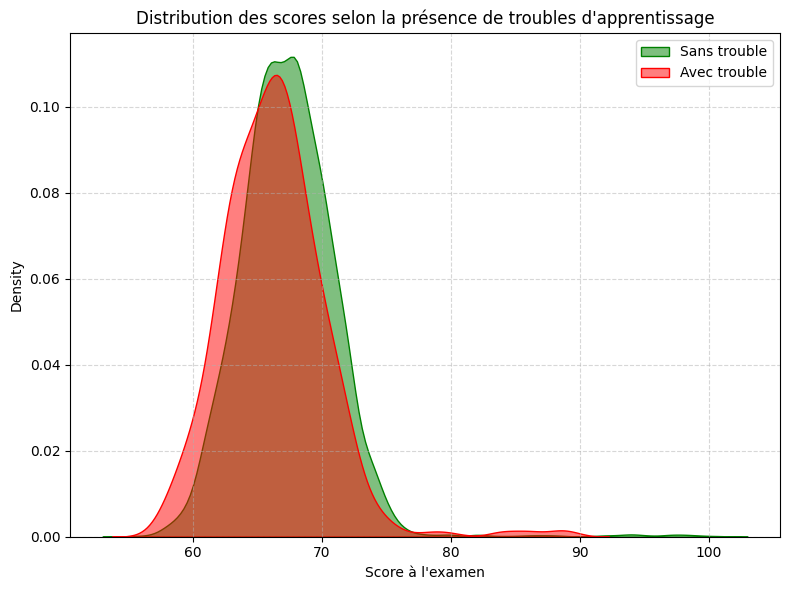

In [157]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df[df['Learning_Disabilities'] == 'No'],
    x='Exam_Score',
    label='Sans trouble',
    fill=True,
    alpha=0.5,
    color='green'
)
sns.kdeplot(
    data=df[df['Learning_Disabilities'] == 'Yes'],
    x='Exam_Score',
    label='Avec trouble',
    fill=True,
    alpha=0.5,
    color='red'
)
plt.title('Distribution des scores selon la présence de troubles d\'apprentissage')
plt.xlabel('Score à l\'examen')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


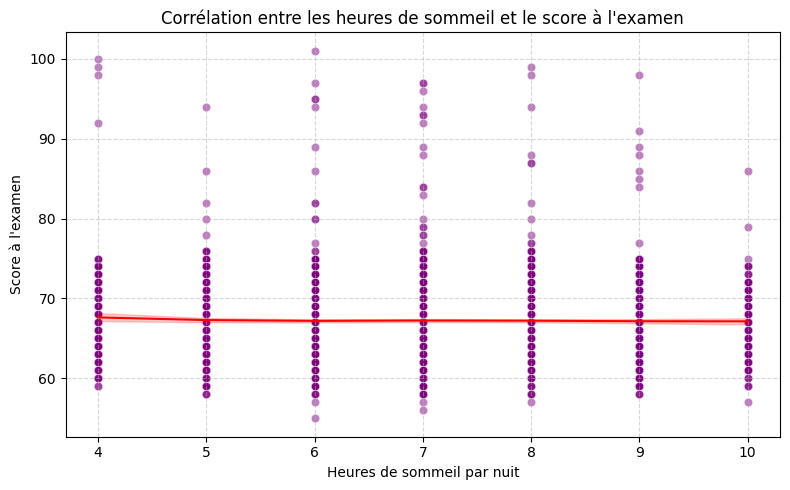

In [158]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Sleep_Hours',
    y='Exam_Score',
    data=df,
    alpha=0.5,
    color='purple'
)
sns.lineplot(
    x='Sleep_Hours',
    y='Exam_Score',
    data=df,
    color='red',
    estimator='mean'
)
plt.title('Corrélation entre les heures de sommeil et le score à l\'examen')
plt.xlabel('Heures de sommeil par nuit')
plt.ylabel('Score à l\'examen')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



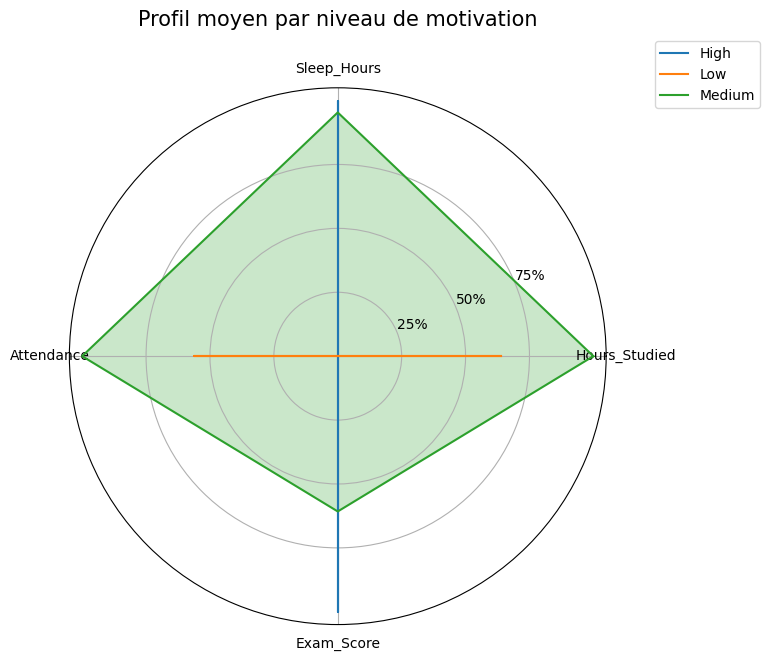

In [159]:
import numpy as np
motivation_profile = df.groupby('Motivation_Level')[['Hours_Studied', 'Sleep_Hours', 'Attendance', 'Exam_Score']].mean()


motivation_profile_norm = (motivation_profile - motivation_profile.min()) / (motivation_profile.max() - motivation_profile.min())

labels = motivation_profile_norm.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Tracé pour chaque niveau de motivation
for index, row in motivation_profile_norm.iterrows():
    values = row.tolist()
    values += values[:1]  # Fermer le polygone
    ax.plot(angles, values, label=index)
    ax.fill(angles, values, alpha=0.25)

# Configuration des axes
ax.set_title("Profil moyen par niveau de motivation", size=15, y=1.1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.25, 0.5, 0.75])
ax.set_yticklabels(["25%", "50%", "75%"])
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

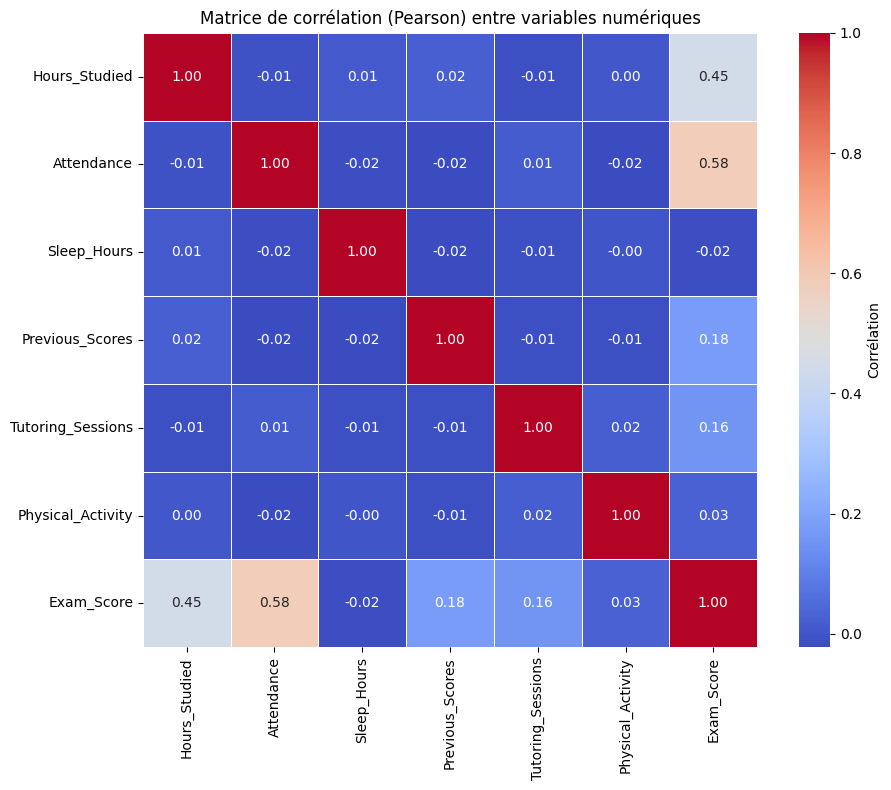

In [160]:
import seaborn as sns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation (Pearson par défaut)
corr_matrix = numeric_df.corr(method='pearson')

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5, cbar_kws={'label': 'Corrélation'})

plt.title('Matrice de corrélation (Pearson) entre variables numériques')
plt.tight_layout()
plt.show()


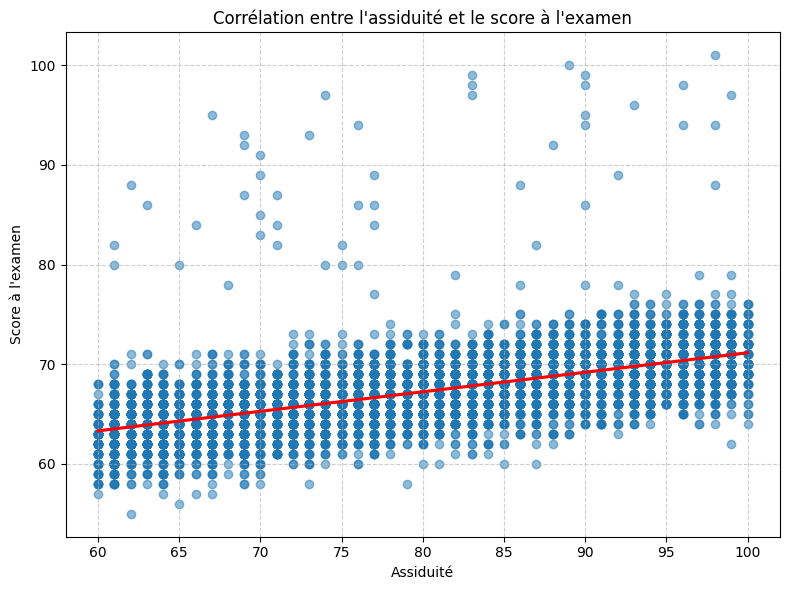

In [161]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Attendance',
    y='Exam_Score',
    data=df,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
    ci=95
)

plt.title('Corrélation entre l\'assiduité et le score à l\'examen')
plt.xlabel('Assiduité')
plt.ylabel('Score à l\'examen')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15312\465076448.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_15312\465076448.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


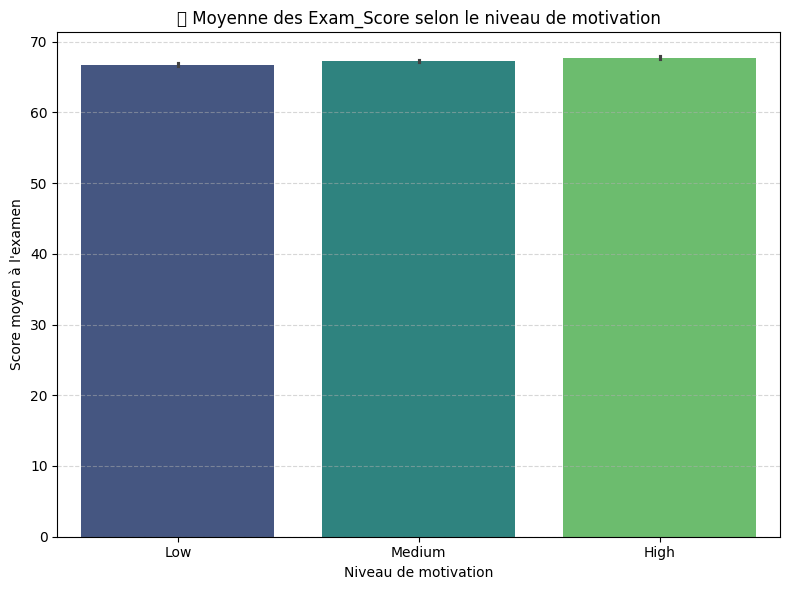

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Taille de la figure
plt.figure(figsize=(8, 6))

# Barplot
sns.barplot(
    data=df,
    x='Motivation_Level',
    y='Exam_Score',
    estimator='mean',
    errorbar='ci',
    palette='viridis'
)

# Personnalisation
plt.title("📊 Moyenne des Exam_Score selon le niveau de motivation")
plt.xlabel("Niveau de motivation")
plt.ylabel("Score moyen à l'examen")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_15312\2042310711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_15312\2042310711.py:16: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


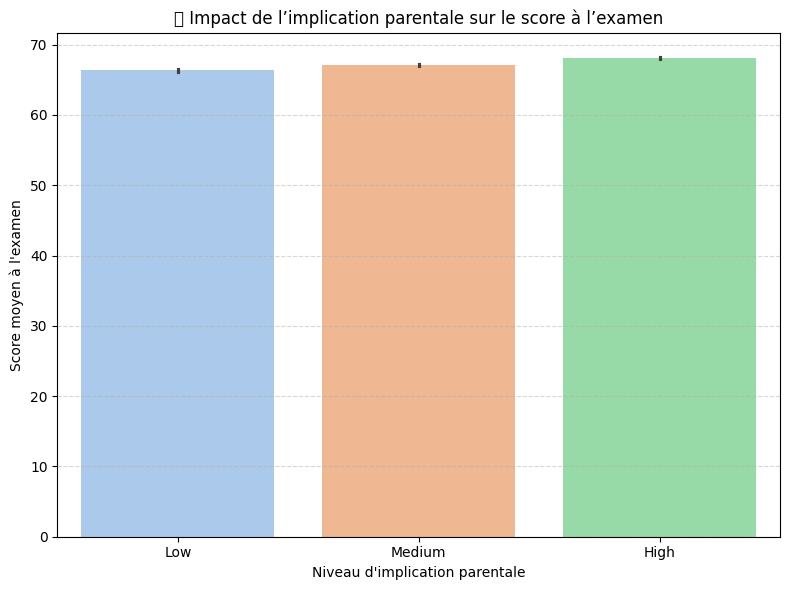

In [163]:
plt.figure(figsize=(8, 6))

sns.barplot(
    data=df,
    x='Parental_Involvement',
    y='Exam_Score',
    estimator='mean',
    errorbar='ci',
    palette='pastel'
)

plt.title("📉 Impact de l’implication parentale sur le score à l’examen")
plt.xlabel("Niveau d'implication parentale")
plt.ylabel("Score moyen à l'examen")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15312\160676933.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_15312\160676933.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


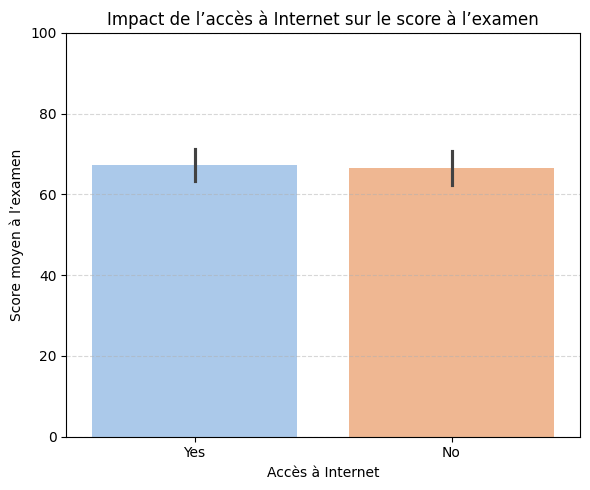

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.barplot(
    x='Internet_Access',
    y='Exam_Score',
    data=df,
    estimator='mean',
    ci='sd',
    palette='pastel'
)

plt.title('Impact de l’accès à Internet sur le score à l’examen')
plt.xlabel('Accès à Internet')
plt.ylabel('Score moyen à l’examen')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


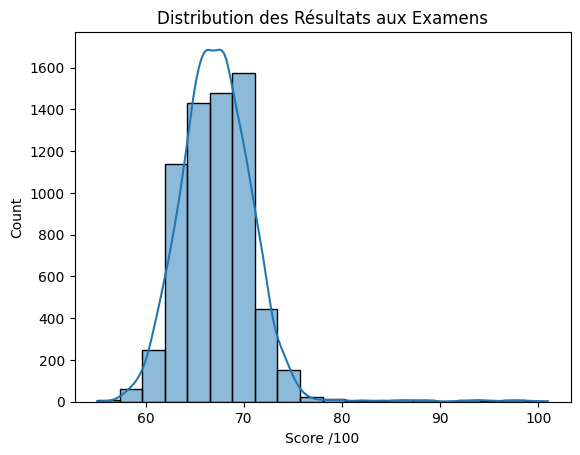

In [165]:
import seaborn as sns
sns.histplot(df['Exam_Score'], kde=True, bins=20)
plt.title("Distribution des Résultats aux Examens")
plt.xlabel("Score /100")
plt.show()

count    6607.000000
mean        3.812465
std         2.356657
min         1.613636
25%         2.840000
50%         3.368421
75%         4.133333
max        92.000000
Name: Study_Efficiency, dtype: float64


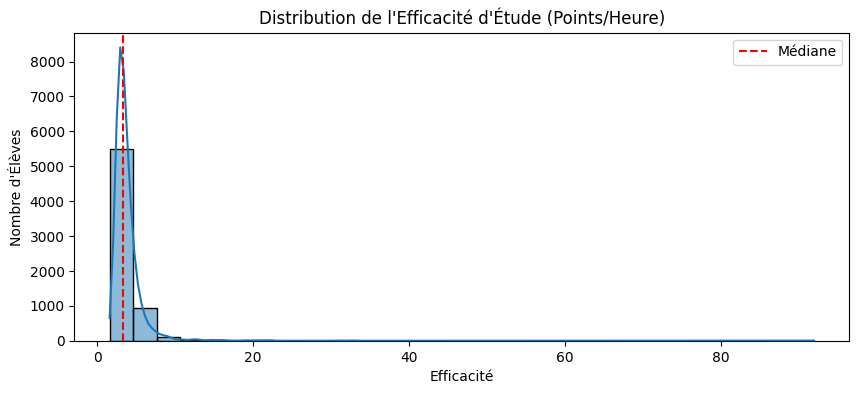

In [166]:

df['Study_Efficiency'] = df['Exam_Score'] / df['Hours_Studied']
# → Mesure le "rendement" du temps investi.

print(df['Study_Efficiency'].describe())

plt.figure(figsize=(10, 4))
sns.histplot(df['Study_Efficiency'], bins=30, kde=True)
plt.title("Distribution de l'Efficacité d'Étude (Points/Heure)")
plt.xlabel("Efficacité")
plt.ylabel("Nombre d'Élèves")
plt.axvline(df['Study_Efficiency'].median(), color='red', linestyle='--', label='Médiane')
plt.legend()
plt.show()

In [167]:
# Création de groupes d'efficacité
df['Efficiency_Group'] = pd.cut(df['Study_Efficiency'], 
                               bins=[0, 2, 3, 5, 100], 
                               labels=['Faible', 'Moyenne', 'Haute', 'Exceptionnelle'])

# Analyse par groupe
efficiency_stats = df.groupby('Efficiency_Group').agg({
    'Exam_Score': 'mean',
    'Hours_Studied': 'mean',
    'Sleep_Hours': 'mean',
    'Teacher_Quality': lambda x: x.value_counts().index[0]  # Mode
}).reset_index()

print(efficiency_stats)

  Efficiency_Group  Exam_Score  Hours_Studied  Sleep_Hours Teacher_Quality
0           Faible   70.044444      36.355556     7.044444          Medium
1          Moyenne   68.349213      26.056180     7.055730          Medium
2            Haute   66.939463      18.176238     7.024328          Medium
3   Exceptionnelle   65.294264      10.115960     6.975062          Medium


C:\Users\user\AppData\Local\Temp\ipykernel_15312\2156607240.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  efficiency_stats = df.groupby('Efficiency_Group').agg({


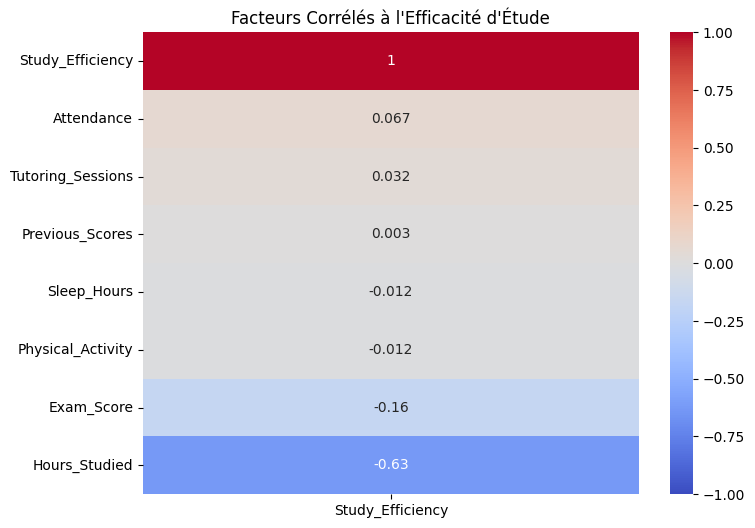

In [168]:
# Heatmap des corrélations avec Study_Efficiency
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['Study_Efficiency']].sort_values('Study_Efficiency', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Facteurs Corrélés à l'Efficacité d'Étude")
plt.show()

In [169]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
Data = pd.read_csv('StudentPerformanceFactors.csv')
Data = Data.dropna()
Y = Data['Exam_Score']
X = Data[['Hours_Studied', 'Attendance','Previous_Scores']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("R^2 Score:", r2_score(Y_test, Y_pred))

Mean Squared Error: 6.478081457858487
R^2 Score: 0.5831169331173267


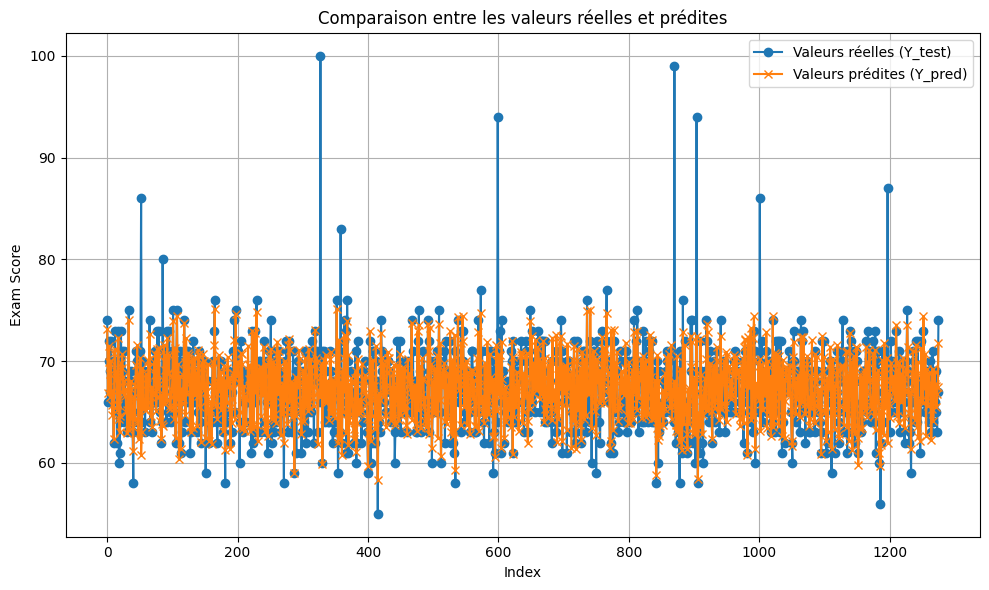

In [170]:
import matplotlib.pyplot as plt

# Tracer les valeurs réelles et prédites
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label='Valeurs réelles (Y_test)', marker='o')
plt.plot(Y_pred, label='Valeurs prédites (Y_pred)', marker='x')

plt.title("Comparaison entre les valeurs réelles et prédites")
plt.xlabel("Index")
plt.ylabel("Exam Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Trouver toutes les colonnes non numériques (y compris 'string')
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Encodage one-hot
df_encoded = pd.get_dummies(df, columns=non_numeric_columns)

# Conversion des booléens en 0/1 (au cas où)
df_encoded = df_encoded.astype(int)

# Séparation features / target
X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.5549157297379335
Mean Squared Error: 3.226875647400741
R-squared: 0.7717114182787671


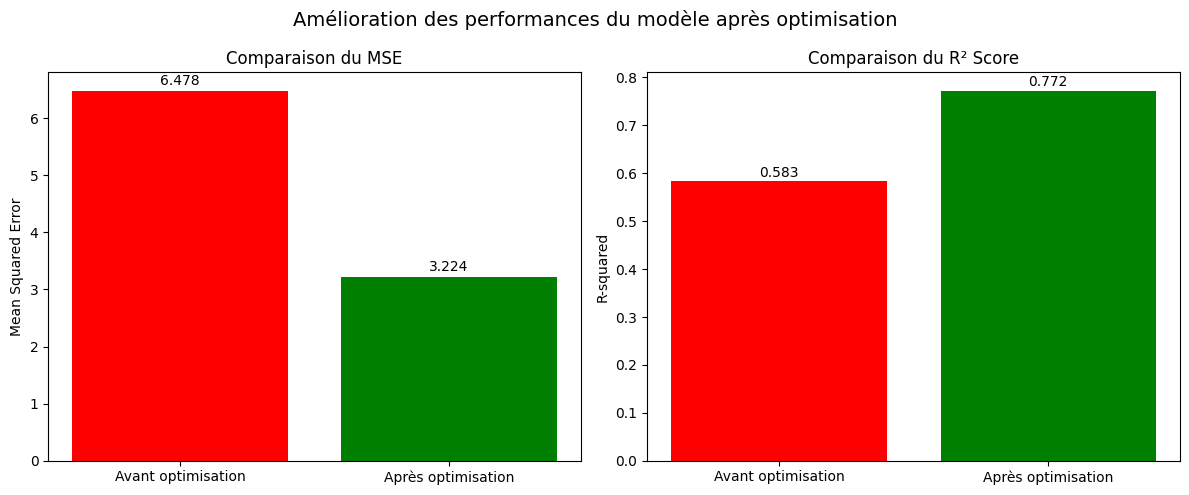

In [178]:
import matplotlib.pyplot as plt
import numpy as np

# Métriques AVANT optimisation (exemple)
mse_avant = 6.478
r2_avant = 0.583

# Métriques APRÈS optimisation
mse_apres = 3.224
r2_apres = 0.772

# Création du graphique
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graphique 1 : MSE
ax1.bar(['Avant optimisation', 'Après optimisation'], [mse_avant, mse_apres], color=['red', 'green'])
ax1.set_title('Comparaison du MSE')
ax1.set_ylabel('Mean Squared Error')
ax1.text(0, mse_avant + 0.1, f"{mse_avant:.3f}", ha='center')  # Valeur avant
ax1.text(1, mse_apres + 0.1, f"{mse_apres:.3f}", ha='center')  # Valeur après

# Graphique 2 : R²
ax2.bar(['Avant optimisation', 'Après optimisation'], [r2_avant, r2_apres], color=['red', 'green'])
ax2.set_title('Comparaison du R² Score')
ax2.set_ylabel('R-squared')
ax2.text(0, r2_avant + 0.01, f"{r2_avant:.3f}", ha='center')  # Valeur avant
ax2.text(1, r2_apres + 0.01, f"{r2_apres:.3f}", ha='center')  # Valeur après

plt.suptitle('Amélioration des performances du modèle après optimisation', fontsize=14)
plt.tight_layout()
plt.show()

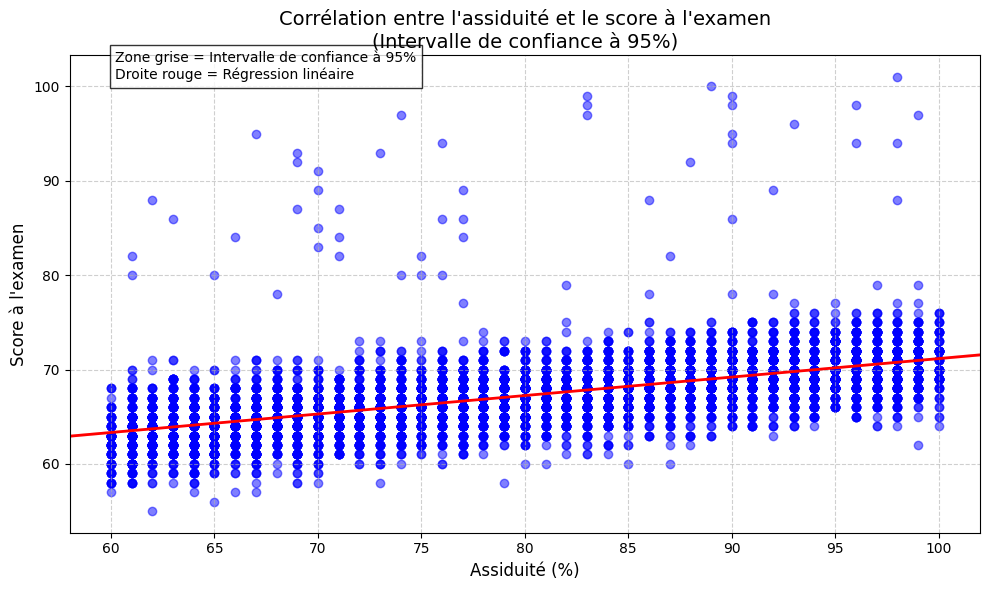

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(
    x='Attendance',
    y='Exam_Score',
    data=df,
    scatter_kws={'alpha': 0.5, 'color': 'blue'},  # Personnalisation des points
    line_kws={'color': 'red', 'lw': 2},          # Personnalisation de la droite
    ci=95,                                       # Intervalle de confiance à 95%
    truncate=False                               # Affiche la droite sur tout le graphique
)

plt.title('Corrélation entre l\'assiduité et le score à l\'examen\n(Intervalle de confiance à 95%)', fontsize=14)
plt.xlabel('Assiduité (%)', fontsize=12)
plt.ylabel('Score à l\'examen', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Optionnel : Ajouter une légende explicative
plt.text(
    0.05, 0.95, 
    "Zone grise = Intervalle de confiance à 95%\nDroite rouge = Régression linéaire",
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8),
    fontsize=10
)

plt.tight_layout()
plt.show()

MAE: 0.6216310266593145, MSE: 3.3349501881439796, R2: 0.7640655755744408
Variables sélectionnées : ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Study_Efficiency', 'Parental_Involvement_Low', 'Parental_Involvement_Medium', 'Access_to_Resources_High', 'Access_to_Resources_Low', 'Extracurricular_Activities_Yes', 'Motivation_Level_High', 'Motivation_Level_Medium', 'Internet_Access_Yes', 'Family_Income_Low', 'Family_Income_Medium', 'Teacher_Quality_High', 'Peer_Influence_Neutral', 'Peer_Influence_Positive', 'Learning_Disabilities_Yes', 'Parental_Education_Level_College', 'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Near', 'Efficiency_Group_Haute', 'Efficiency_Group_Exceptionnelle']
